## Figure 1: Percent of Forbes 400 members by source of wealth

### From Elite Embeddedness

By Charlie Eaton and Albina Gibadullina

In [1]:
use data/d_forbes400_alum_board_1989_2003_2017, clear
set scheme plotplain
replace financedetail="non-financial" if financedetail==" non-financial"
gen nonfin=(financedetail=="non-financial" & technology!=1)

(646 real changes made)


In [2]:
gen ob=1
collapse (sum) pehedge otherfin nonfin tech ob, by(year)
gen totalfin=pehedge +otherfin 

In [3]:
foreach var in pehedge otherfin totalfin tech nonfin {
    replace `var'=`var' / ob * 100
    format `var' %9.1fc
}

(3 real changes made)
(3 real changes made)
(3 real changes made)
(3 real changes made)
(3 real changes made)


In [4]:
label var pehedge "private equity & hedge"
label var otherfin "other finance"
label var technology "technology"
label var totalfin "total finance"

In [5]:
list


     +----------------------------------------------------------------+
     | year   pehedge   otherfin   nonfin   techno~y    ob   totalfin |
     |----------------------------------------------------------------|
  1. | 1989       5.2        7.2     83.5        4.0   400       12.5 |
  2. | 2003      10.5       10.8     68.8       10.0   400       21.2 |
  3. | 2017      16.2        8.8     61.3       13.8   400       25.0 |
     +----------------------------------------------------------------+


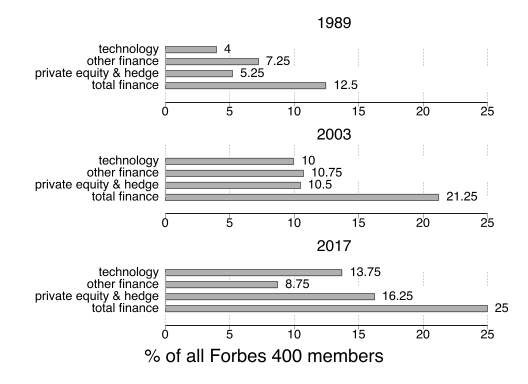

In [6]:
statplot tech otherfin pehedge totalfin, by(year, cols(1) note("") ixaxes ) name(Forbes_industry, replace) ///
ytitle("% of all Forbes 400 members") subtitle(, nobox)   ysize(6) blabel(bar)

In [7]:
graph export figures/f1_forbes400_wealthsource.pdf, replace

file figures/f1_forbes400_wealthsource.pdf saved as PDF format


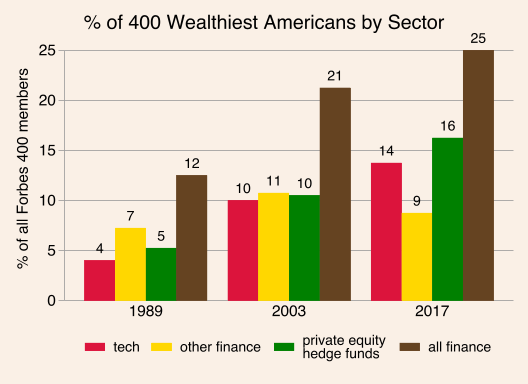

In [8]:
graph bar tech otherfin pehedge totalfin, over(year, label(labsize(medium))) name(Forbes_industry, replace) ///
ytitle("% of all Forbes 400 members", size(medium)) subtitle(, nobox) xsize(10) ///
blabel(bar, size(medsmall) format(%2.0f)) scheme(dubois) ylabel(, labsize(medium)) ///
title("% of 400 Wealthiest Americans by Sector", size(large)) /// 
legend(pos(6) size(medsmall) col(4) label(1 "tech") label(2 "other finance") label(3 "private equity" "hedge funds") label(4 "all finance"))